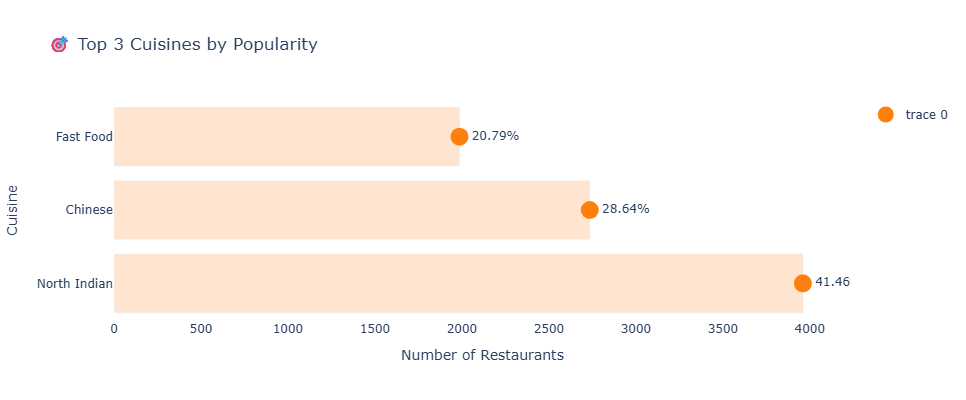

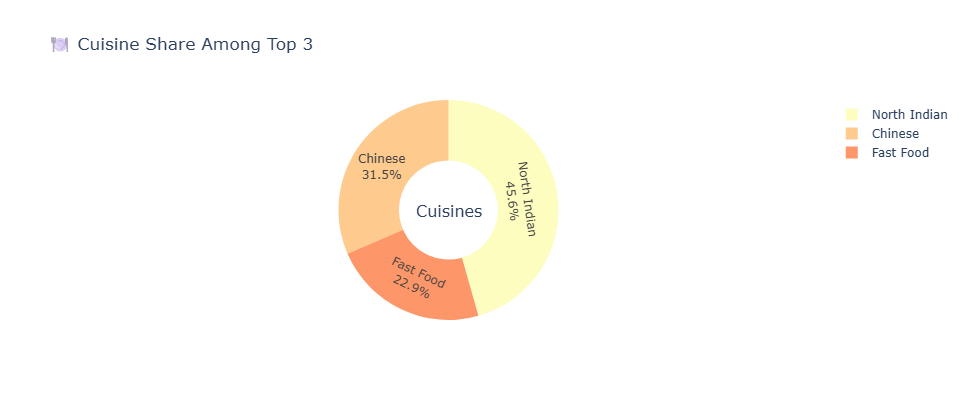

In [5]:
#Task 1
#1. Determine the top three most common cuisines in the dataset.
#2. Calculate the percentage of restaurants that serve each of the top cuisines.

#---

# Import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv(r"C:\Users\acer\Downloads\Data Analysis Internship__Dataset__Cognifyz Technologies.csv")

# Clean and process 'Cuisines' column
cuisine_series = df['Cuisines'].dropna().str.split(', ')
all_cuisines = cuisine_series.explode()

# Get top 3 cuisines and their percentages
top_cuisines = all_cuisines.value_counts().head(3)
total_restaurants = df.shape[0]
cuisine_percentages = (top_cuisines / total_restaurants * 100).round(2)

# DataFrame for visualization
top_df = pd.DataFrame({
    'Cuisine': top_cuisines.index,
    'Count': top_cuisines.values,
    'Percentage': cuisine_percentages.values
})

# -----------------------------------------
# 🔹 Chart 1: Enhanced Horizontal Lollipop Chart
# -----------------------------------------
fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=top_df['Count'],
    y=top_df['Cuisine'],
    mode='markers+text',
    marker=dict(size=18, color='#FF7F0E'),
    text=top_df['Percentage'].astype(str) + '%',
    textposition='middle right'
))

fig1.add_trace(go.Bar(
    x=top_df['Count'],
    y=top_df['Cuisine'],
    orientation='h',
    marker=dict(color='rgba(255,127,14,0.2)'),
    showlegend=False
))

fig1.update_layout(
    title='🎯 Top 3 Cuisines by Popularity',
    xaxis_title='Number of Restaurants',
    yaxis_title='Cuisine',
    plot_bgcolor='white',
    height=400
)
fig1.show()
fig1.write_html("top_cuisines_lollipop.html")

# -----------------------------------------
# 🔹 Chart 2: Donut Chart for % Share
# -----------------------------------------
fig2 = go.Figure(data=[
    go.Pie(
        labels=top_df['Cuisine'],
        values=top_df['Count'],
        hole=0.45,
        textinfo='percent+label',
        hoverinfo='label+value+percent',
        marker=dict(colors=px.colors.sequential.Magma_r)
    )
])

fig2.update_layout(
    title="🍽️ Cuisine Share Among Top 3",
    annotations=[dict(text='Cuisines', x=0.5, y=0.5, font_size=16, showarrow=False)],
    height=400
)

fig2.show()
fig2.write_html("top_cuisines_donut.html")
